In [1]:
import pycourse as pyc
import numpy as np
import matplotlib.pyplot as plt

### Setup

In [2]:

course=pyc.Course(name='Test Class',code='NATS0000',semester='Winter',year='2024')

In [3]:
scheme=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[10,10,30,50],ndrops=[1,0,0,0],nmisses=[0,0,0,0],reweighting=['internal','internal','external','external'])

In [4]:
#Read in header of gradebook to find column number of each assessment
file=open('test_gradebook.csv','r')
header=file.readline().split(',')
for i,h in enumerate(header):
    print(i,h)
file.close()

0 ﻿First name
1 Last name
2 ID number
3 Email address
4 External tool: Office Hours Zoom Link - Fridays @ 12:30 pm (Real)
5 External tool: iClicker Lecture Quizzes (Real)
6 External tool: Lecture Recordings (Real)
7 iClicker Week 1 (Real)
8 iClicker Week 2 (Real)
9 iClicker Week 3 (Real)
10 iClicker Week 4 (Real)
11 iClicker Week 5 (Real)
12 iClicker Week 6 (Real)
13 iClicker Week 7 (Real)
14 iClicker Week 8 (Real)
15 iClicker Week 9 (Real)
16 iClicker Week 10 (Real)
17 iClicker Week 11 (Real)
18 iClicker Week 13 (Real)
19 iClicker Week 14 (Real)
20 iClicker Week 15 (Real)
21 iClicker Week 16 (Real)
22 iClicker Week 17 (Real)
23 iClicker Quizzes total (Real)
24 Quiz: Assignment 1 (Real)
25 Quiz: Assignment 2 (Real)
26 Quiz: Assignment 3 (Real)
27 Quiz: Assignment 4 (Real)
28 Quiz: Assignment 5 (Real)
29 Quiz: Assignment 7 (Real)
30 Quiz: Assignment 8 (Real)
31 Quiz: Assignment 9 (Real)
32 Quiz: Assignment 6 (Real)
33 Assignments total (Real)
34 Turnitin Assignment 2: Project 1: Do-it-y

In [5]:
#Read in full gradebook
gradebook=np.loadtxt('test_gradebook.csv',skiprows=1,dtype=str,delimiter=',')

In [6]:
#Add all of the students based on information in gradebook
course.add_students(gradebook[:,0],gradebook[:,1],gradebook[:,2],gradebook[:,3])

1

In [7]:
#Based on information from the header, manually add each assessment
for i in range(7,23):
    nassess=1
    course.add_assessment('iClicker',nassess,gradebook[:,i].tolist())
    nassess+=1
    
for i in [24,25,26,27,28,32,29,30,31]:
    nassess=1
    course.add_assessment('Assignment',i,gradebook[:,i].tolist())
    nassess+=1
    
for i in [34,35,36]:
    nassess=1
    course.add_assessment('Project',i,gradebook[:,i].tolist())
    nassess+=1
    
for i in [38,39]:
    nassess=1
    course.add_assessment('Exam',i,gradebook[:,i].tolist())
    nassess+=1

/Users/jeremywebb/anaconda3/lib/python3.11/site-packages/pycourse/courses.py:117: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if category not in self.cat:


In [8]:
#Sanity check to confirm what the course categories are
course.cat

array(['iClicker', 'Assignment', 'Project', 'Exam'], dtype='<U32')

In [9]:
#Sanity check to confirm which grade from the gradebook corresponds to what category
course.categories

array(['iClicker', 'iClicker', 'iClicker', 'iClicker', 'iClicker',
       'iClicker', 'iClicker', 'iClicker', 'iClicker', 'iClicker',
       'iClicker', 'iClicker', 'iClicker', 'iClicker', 'iClicker',
       'iClicker', 'Assignment', 'Assignment', 'Assignment', 'Assignment',
       'Assignment', 'Assignment', 'Assignment', 'Assignment',
       'Assignment', 'Project', 'Project', 'Project', 'Exam', 'Exam'],
      dtype='<U32')

In [10]:
course.calc_grades(scheme,return_weighting=True)

/Users/jeremywebb/anaconda3/lib/python3.11/site-packages/pycourse/courses.py:240: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if cat in accomodation.categories and num in accomodation.nums:


### Analysis

In [11]:
#Consider student1:
print('Student 1s grade in each assessment is: ',course.grades[0])
print('The default weighting scheme was: ',course.weights0)
print('The weightings used to calculate Student1s grade are: ',course.weights[0])

print('Student 1s final grade is :',course.final_grades[0])
print('Student 1s grades in each category are :',course.final_cat_grades[0])


Student 1s grade in each assessment is:  [ 50.          50.         100.          91.67       100.
  78.57       100.           0.         100.          80.
  90.           0.         100.           0.          91.67
  80.          80.95        71.43        92.          76.19
  95.           0.         100.          65.          80.
  88.          93.33         0.          36.          78.57432125]
The default weighting scheme was:  [ 0.625       0.625       0.625       0.625       0.625       0.625
  0.625       0.625       0.625       0.625       0.625       0.625
  0.625       0.625       0.625       0.625       1.11111111  1.11111111
  1.11111111  1.11111111  1.11111111  1.11111111  1.11111111  1.11111111
  1.11111111 10.         10.         10.         25.         25.        ]
The weightings used to calculate Student1s grade are:  [ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.          0.66666667  0.66666667  0.66666667  0.66666667
  0.66

In [12]:
#Consider global properties
print('Average = ',np.mean(course.final_grades))
print('Median = ',np.median(course.final_grades))
print('STD = ',np.std(course.final_grades))

Average =  60.717798228512116
Median =  63.25323160986111
STD =  16.924714303409743


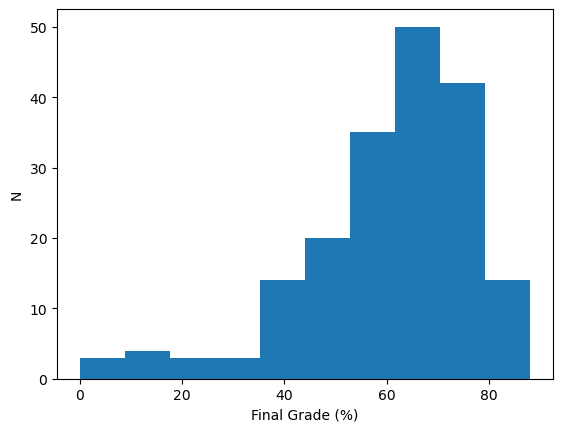

In [13]:
#Plot final grade distribution

plt.hist(course.final_grades)
plt.xlabel('Final Grade (%)')
plt.ylabel('N')
plt.show()
plt.close()

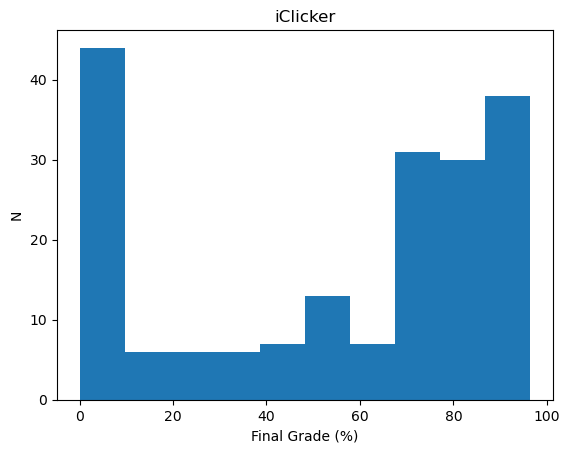

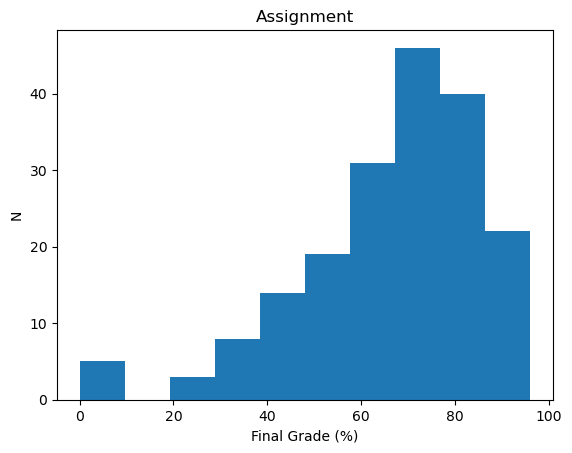

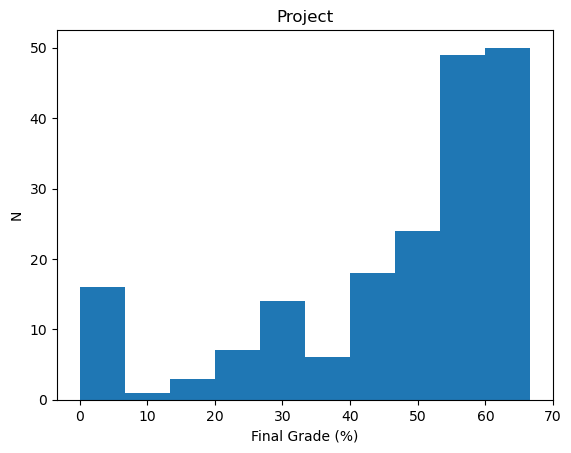

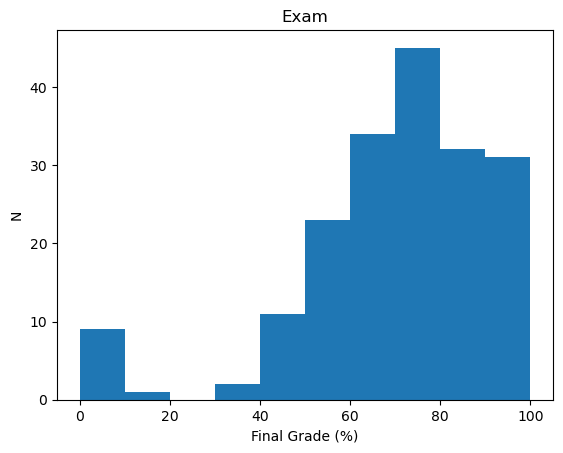

In [14]:
#Plot grade distribution in each category

for i in range(0,len(course.cat)):
    #Plot final grade distribution
    plt.hist(100.0*course.final_cat_grades[:,i]/scheme.weights[course.cat[i]])
    plt.xlabel('Final Grade (%)')
    plt.ylabel('N')
    plt.title(course.cat[i])
    plt.show()
    plt.close()

### Optimize Grades

In [15]:
scheme_1=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[10,10,30,50],ndrops=[1,0,0,0],nmisses=[0,0,0,0],reweighting=['internal','internal','external','external'])

scheme_2=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[10,10,20,40],ndrops=[0,0,0,0],nmisses=[1,1,1,1],reweighting=['internal','internal','external','external'])

scheme_3=pyc.GradingScheme(['iClicker','Assignment','Project','Exam']
                      ,weights=[20,20,20,20],ndrops=[1,1,0,0],nmisses=[0,0,0,0],reweighting=['internal','internal','external','external'])

In [16]:
course.optimize_grades([scheme_1,scheme_2,scheme_3],return_weighting=True)

In [17]:
#Consider student1:
print('Student 1s grade in each assessment is: ',course.grades[0])
print('The weightings used to calculate Student1s grade are: ',course.weights[0])

print('Student 1s final grade is :',course.final_grades[0])
print('Student 1s grades in each category are :',course.final_cat_grades[0])

Student 1s grade in each assessment is:  [ 50.          50.         100.          91.67       100.
  78.57       100.           0.         100.          80.
  90.           0.         100.           0.          91.67
  80.          80.95        71.43        92.          76.19
  95.           0.         100.          65.          80.
  88.          93.33         0.          36.          78.57432125]
The weightings used to calculate Student1s grade are:  [ 0.90909091  0.90909091  0.90909091  0.90909091  0.90909091  0.90909091
  0.90909091  0.          0.90909091  0.90909091  0.90909091  0.90909091
  0.90909091  0.90909091  0.90909091  0.90909091  1.70454545  1.70454545
  1.70454545  1.70454545  1.70454545  0.          1.70454545  1.70454545
  1.70454545  9.09090909  9.09090909  0.         27.27272727 27.27272727]
Student 1s final grade is : 69.10007624999999
Student 1s grades in each category are : [10.10827273 11.25971591 16.48454545 31.24754216]


In [18]:
#Consider global properties
print('Average = ',np.mean(course.final_grades))
print('Median = ',np.median(course.final_grades))
print('STD = ',np.std(course.final_grades))

Average =  68.13503295868935
Median =  71.94036145890152
STD =  17.722894478033226


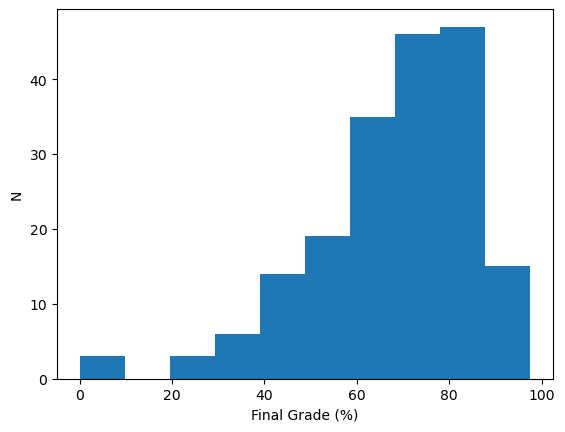

In [19]:
#Plot final grade distribution

plt.hist(course.final_grades)
plt.xlabel('Final Grade (%)')
plt.ylabel('N')
plt.show()
plt.close()